In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import os
from get_raw_data import get_ring_dataset

In [2]:
raw_df = get_ring_dataset()

In [3]:
"""
0 - unmarked data,
1 - hand at rest, 
2 - hand clenched in a fist, 
3 - wrist flexion,
4 – wrist extension,
5 – radial deviations,
6 - ulnar deviations,
7 - extended palm (the gesture was not performed by all subjects).
"""
# Removing unmarked data
marked_df = raw_df[raw_df['class'] != 0]

# Removing rows with invalid values
filtered_df = marked_df.dropna()

# Get class list
class_list = filtered_df['class'].tolist()

# Get data list of lists
data_list = filtered_df.drop(columns=['time', 'class'], axis=1).values.tolist()

In [4]:
# Split testing and training data
data_train, data_test, class_train, class_test = train_test_split(data_list, class_list, test_size=0.75, random_state=0)

In [5]:
# Train with extra trees classifier
model = ExtraTreesClassifier()
model.fit(data_train, class_train)

ExtraTreesClassifier()

In [6]:
# Test model
class_prediction = model.predict(data_test)

Cohen Kappa Score:  0.9723775327190962


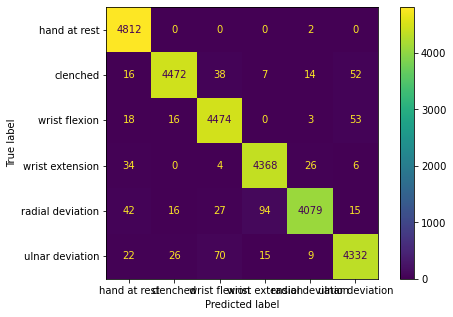

In [7]:
# Print cohen kappa score
print("Cohen Kappa Score: ", cohen_kappa_score(class_test, class_prediction))

# Check results
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(class_test, class_prediction),
    display_labels=["hand at rest", "clenched", "wrist flexion", 
                    "wrist extension", "radial deviation", 
                    "ulnar deviation"],
)

cmp.plot(ax=ax)
plt.show()